In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.cluster import KMeans

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay

from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score


import warnings
warnings.filterwarnings('ignore')

In [2]:
absenteeism_df = pd.read_csv("DS1_C9_S7_Project_AbsenteeismAtWork_Data.csv",sep=';')
absenteeism_df


,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0


In [3]:
absenteeism_df.to_csv("data project ml.csv")

In [4]:
absenteeism_df.columns = absenteeism_df.columns.str.replace(' ','_')
absenteeism_df

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0


In [5]:
absenteeism_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason_for_absence               740 non-null    int64  
 2   Month_of_absence                 740 non-null    int64  
 3   Day_of_the_week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation_expense           740 non-null    int64  
 6   Distance_from_Residence_to_Work  740 non-null    int64  
 7   Service_time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work_load_Average/day_           740 non-null    float64
 10  Hit_target                       740 non-null    int64  
 11  Disciplinary_failure             740 non-null    int64  
 12  Education             

In [6]:
absenteeism_df['Seasons'].unique()

array([1, 4, 2, 3], dtype=int64)

In [7]:
bins = [0,1,2,3,4]
label = ['summer','winter','autum','spring']
absenteeism_df['Season_c'] = pd.cut(absenteeism_df['Seasons'],bins=bins,labels = label)

In [8]:
absenteeism_df['Day_of_the_week'].unique()

array([3, 4, 5, 6, 2], dtype=int64)

In [9]:
bins = [0,1,2,3,4,5,6,7]
label = ['sunday','monday','tuesday','wednesday','thursday','friday','saturday']
absenteeism_df['Day_of_the_week_c']=pd.cut(absenteeism_df['Day_of_the_week'],bins = bins,labels=label)

In [10]:
absenteeism_df

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,...,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours,Season_c,Day_of_the_week_c
0,11,26,7,3,1,289,36,13,33,239.554,...,2,1,0,1,90,172,30,4,summer,tuesday
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,0,0,98,178,31,0,summer,tuesday
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,0,89,170,31,2,summer,wednesday
3,7,7,7,5,1,279,5,14,39,239.554,...,2,1,1,0,68,168,24,4,summer,thursday
4,11,23,7,5,1,289,36,13,33,239.554,...,2,1,0,1,90,172,30,2,summer,thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,2,1,0,1,90,172,30,8,summer,tuesday
736,1,11,7,3,1,235,11,14,37,264.604,...,1,0,0,1,88,172,29,4,summer,tuesday
737,4,0,0,3,1,118,14,13,40,271.219,...,1,1,0,8,98,170,34,0,summer,tuesday
738,8,0,0,4,2,231,35,14,39,271.219,...,2,1,0,2,100,170,35,0,winter,wednesday


In [11]:
absenteeism_df['Education'].unique()

array([1, 3, 2, 4], dtype=int64)

In [12]:
bins = [0,1,2,3,4]
label = ['high scool','UG','PG','Masters']
absenteeism_df['Education_c'] = pd.cut(absenteeism_df['Education'],bins=bins,labels=label)

In [13]:
absenteeism_df['Disciplinary_failure'].unique()

array([0, 1], dtype=int64)

In [14]:
bins = [-1,0,1]
label = ['No','Yes']
absenteeism_df['Disciplinary_failure_c'] = pd.cut(absenteeism_df['Disciplinary_failure'],bins=bins,labels=label)

In [15]:
absenteeism_df['Social_drinker'].unique()

array([1, 0], dtype=int64)

In [16]:
bins = [-1,0,1]
label = ['No','Yes']
absenteeism_df['Social_drinker_c'] = pd.cut(absenteeism_df['Social_drinker'],bins=bins,labels=label)

In [17]:
absenteeism_df['Social_smoker'].unique()

array([0, 1], dtype=int64)

In [18]:
bins = [-1,0,1]
label = ['No','Yes']
absenteeism_df['Social_smoker_c'] = pd.cut(absenteeism_df['Social_smoker'],bins=bins,labels=label)

In [19]:
absenteeism_df['Reason_for_absence'].unique()

array([26,  0, 23,  7, 22, 19,  1, 11, 14, 21, 10, 13, 28, 18, 25, 24,  6,
       27, 17,  8, 12,  5,  9, 15,  4,  3,  2, 16], dtype=int64)

In [20]:
threshold = [14,17,21]
labels = ['Group-1','Group-2','Group-3','Group-4']
# functions to assign the labels based on condition.
def assign_labels(values):
    if values <= threshold[0]:
        return labels[0]
    elif values <= threshold[1]:
        return labels[1]
    elif values <= threshold[2]:
        return labels[2]
    else :
        return labels[3]
# apply the function to the columns to create a new column 
absenteeism_df['Reason_for_absence_c'] = absenteeism_df['Reason_for_absence'].apply(assign_labels)
absenteeism_df['Reason_for_absence_c'].unique()

array(['Group-4', 'Group-1', 'Group-3', 'Group-2'], dtype=object)

In [21]:
absenteeism_df['Absenteeism_time_in_hours'].unique()

array([  4,   0,   2,   8,  40,   1,   7,   3,  32,   5,  16,  24,  64,
        56,  80, 120, 112, 104,  48], dtype=int64)

In [22]:
absenteeism_df['Absenteeism_time_in_hours_c'] = np.where(absenteeism_df['Absenteeism_time_in_hours']>absenteeism_df['Absenteeism_time_in_hours'].mean(),'High_Absentece','Low_absent')

In [23]:
absenteeism_df['Absenteeism_time_in_hours_c'].unique()

array(['Low_absent', 'High_Absentece'], dtype=object)

In [24]:
absenteeism_df['Hit_target'].unique()

array([ 97,  92,  93,  95,  99,  96,  94,  98,  81,  88, 100,  87,  91],
      dtype=int64)

In [25]:
absenteeism_df['Hit_target_c'] = np.where(absenteeism_df['Hit_target']>absenteeism_df['Hit_target'].mean(),'Achieve','Not_Achieve')

In [26]:
absenteeism_df['Hit_target_c'].unique()

array(['Achieve', 'Not_Achieve'], dtype=object)

In [27]:
absenteeism_df['Age'].unique()

array([33, 50, 38, 39, 28, 36, 34, 37, 41, 47, 29, 48, 32, 27, 43, 40, 31,
       30, 49, 58, 46, 53], dtype=int64)

In [28]:
thresh = [30,35,40,45,50,55]
labels = ['25 to 30','30 to 35','35 to 40','40 to 45','45 to 50','50 to 55','55 to 60']
def label_assign(values):
    if values <= thresh[0]:
        return labels[0]
    elif values <= thresh[1]:
        return labels[1]
    elif values <= thresh[2]:
        return labels[2]
    elif values <= thresh[3]:
        return labels[3]
    elif values <= thresh[4]:
        return labels[4]
    elif values <= thresh[5]:
        return labels[5]
    else:
        return labels[6]

In [29]:
absenteeism_df['Age_c'] = absenteeism_df['Age'].apply(label_assign)
absenteeism_df['Age_c'].unique()

array(['30 to 35', '45 to 50', '35 to 40', '25 to 30', '40 to 45',
       '55 to 60', '50 to 55'], dtype=object)

In [30]:
absenteeism_df.isnull().sum()

ID                                 0
Reason_for_absence                 0
Month_of_absence                   0
Day_of_the_week                    0
Seasons                            0
Transportation_expense             0
Distance_from_Residence_to_Work    0
Service_time                       0
Age                                0
Work_load_Average/day_             0
Hit_target                         0
Disciplinary_failure               0
Education                          0
Son                                0
Social_drinker                     0
Social_smoker                      0
Pet                                0
Weight                             0
Height                             0
Body_mass_index                    0
Absenteeism_time_in_hours          0
Season_c                           0
Day_of_the_week_c                  0
Education_c                        0
Disciplinary_failure_c             0
Social_drinker_c                   0
Social_smoker_c                    0
R

In [31]:
absenteeism_df.columns

Index(['ID', 'Reason_for_absence', 'Month_of_absence', 'Day_of_the_week',
       'Seasons', 'Transportation_expense', 'Distance_from_Residence_to_Work',
       'Service_time', 'Age', 'Work_load_Average/day_', 'Hit_target',
       'Disciplinary_failure', 'Education', 'Son', 'Social_drinker',
       'Social_smoker', 'Pet', 'Weight', 'Height', 'Body_mass_index',
       'Absenteeism_time_in_hours', 'Season_c', 'Day_of_the_week_c',
       'Education_c', 'Disciplinary_failure_c', 'Social_drinker_c',
       'Social_smoker_c', 'Reason_for_absence_c',
       'Absenteeism_time_in_hours_c', 'Hit_target_c', 'Age_c'],
      dtype='object')

### Task 2
### Understanding Absenteeism Patterns

Age_c
25 to 30    177
30 to 35    115
35 to 40    307
40 to 45     58
45 to 50     74
50 to 55      1
55 to 60      8
Name: Absenteeism_time_in_hours, dtype: int64


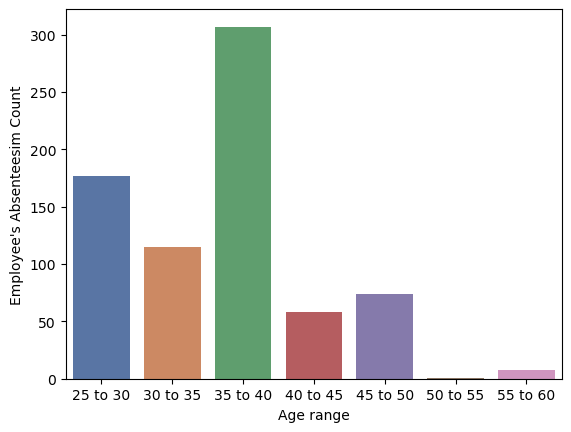

In [32]:
Age = absenteeism_df.groupby(['Age_c'])['Absenteeism_time_in_hours'].count()
print(Age)
sns.barplot(x=Age.index,y=Age.values,palette='deep')
plt.xlabel('Age range')
plt.ylabel("Employee's Absenteesim Count")
plt.show()


### Interpretation:
- The employees absenteesim is high between the age group category from 35 to 40 at a count of 307nemployees where absent. 

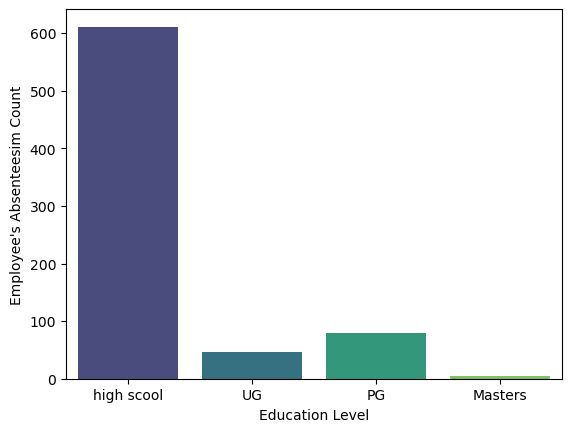

In [33]:
sns.countplot(x='Education_c',data=absenteeism_df,palette='viridis')
plt.xlabel('Education Level')
plt.ylabel("Employee's Absenteesim Count")
plt.show()

### Interpretation:
- In the education level 'High Scool' the employees absenteesim is maximum around count of 600 employees.

In [34]:
absenteeism_df['Son'].unique()

array([2, 1, 0, 4, 3], dtype=int64)

Season_c
summer    170
winter    192
autum     183
spring    195
Name: Absenteeism_time_in_hours, dtype: int64


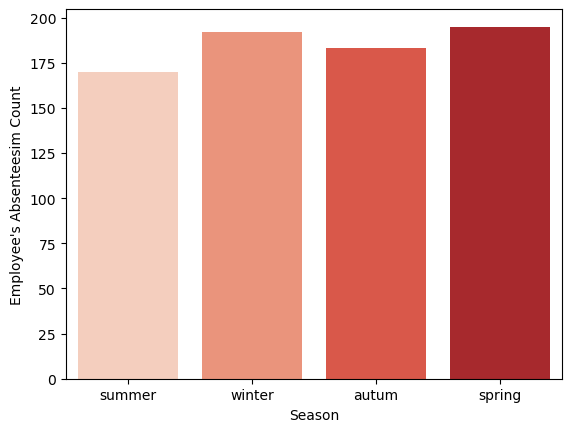

In [35]:
season = absenteeism_df.groupby(['Season_c'])['Absenteeism_time_in_hours'].count()
print(season)
sns.barplot(x=season.index,y=season.values,palette='Reds')
plt.xlabel('Season')
plt.ylabel("Employee's Absenteesim Count")
plt.show()

### Interpretation
- In the 'Spring' and 'Winter' season the maximum of employees absenteesim has occured

### Absenteeism vary across work characteristics

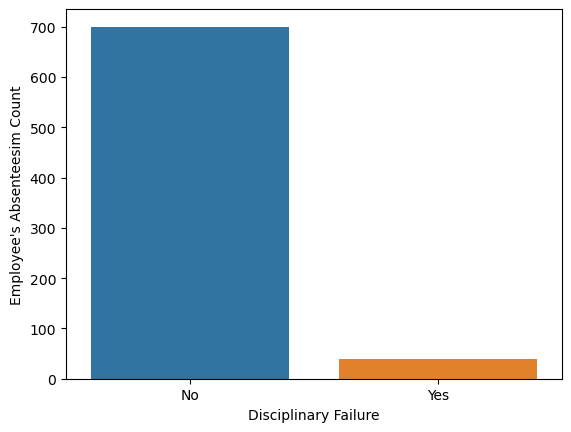

In [36]:
sns.countplot(x='Disciplinary_failure_c',data=absenteeism_df)
plt.xlabel('Disciplinary Failure')
plt.ylabel("Employee's Absenteesim Count")
plt.show()

### Interpretation :
- The absenteesim count of employess is much high where there is no disciplinary failure amoung the employees.
- There is very less absenteesim count in case of disciplinary failure category.

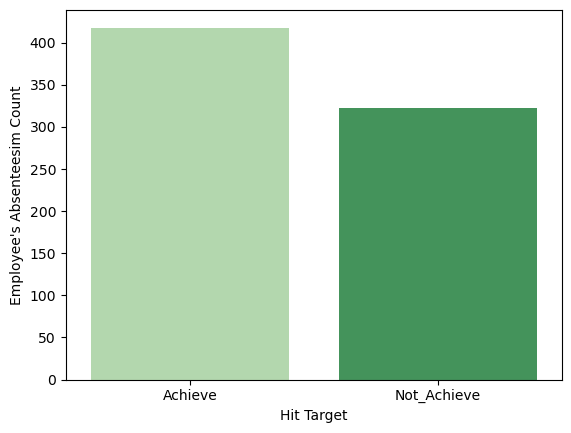

In [37]:
sns.countplot(x='Hit_target_c',data=absenteeism_df,palette='Greens')
plt.xlabel('Hit Target')
plt.ylabel("Employee's Absenteesim Count")
plt.show()

### Interpretation :
- The absenteesim is high where the employess who achieved their target while compared to the employees not archieved the target.

### Task 3
### Analysing Reasons for Absenteeism

Reason_for_absence
23    149
28    112
27     69
13     55
0      43
Name: count, dtype: int64


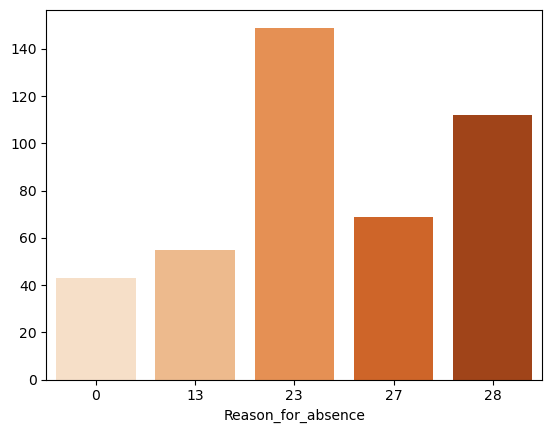

In [38]:
reason_count = absenteeism_df['Reason_for_absence'].value_counts()
print(reason_count[:5])
sns.barplot(x=reason_count.index[:5],y=reason_count.values[:5],palette='Oranges')
plt.show()

### Interpretation:
- The reason number 23 has maximum count for the absenteesim, which indicated on the basis of 'Medical Consultant' reason more number of employees are absent then followed by reason number 28 whic is 'Dental Consultant'.

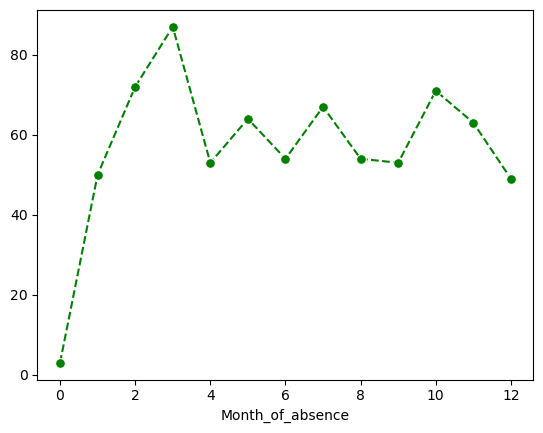

In [39]:
month_counts = absenteeism_df['Month_of_absence'].value_counts()
sns.lineplot(x=month_counts.index,y=month_counts.values,marker='o',c='green',linestyle='--',markersize=7)
plt.xlabel("Month of Absence")
plt.ylabel("Employee's absenteesim count")
plt.show()

### Interpretation:
- In the month of 3 the absenteesim count is maximum, which means at 'March' month maximum empoyees are absent while compared to the other months.

### Task 4
### Predicting absenteeism Duration

In [40]:
absenteeism_df

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,...,Season_c,Day_of_the_week_c,Education_c,Disciplinary_failure_c,Social_drinker_c,Social_smoker_c,Reason_for_absence_c,Absenteeism_time_in_hours_c,Hit_target_c,Age_c
0,11,26,7,3,1,289,36,13,33,239.554,...,summer,tuesday,high scool,No,Yes,No,Group-4,Low_absent,Achieve,30 to 35
1,36,0,7,3,1,118,13,18,50,239.554,...,summer,tuesday,high scool,Yes,Yes,No,Group-1,Low_absent,Achieve,45 to 50
2,3,23,7,4,1,179,51,18,38,239.554,...,summer,wednesday,high scool,No,Yes,No,Group-4,Low_absent,Achieve,35 to 40
3,7,7,7,5,1,279,5,14,39,239.554,...,summer,thursday,high scool,No,Yes,Yes,Group-1,Low_absent,Achieve,35 to 40
4,11,23,7,5,1,289,36,13,33,239.554,...,summer,thursday,high scool,No,Yes,No,Group-4,Low_absent,Achieve,30 to 35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,summer,tuesday,high scool,No,Yes,No,Group-1,High_Absentece,Not_Achieve,30 to 35
736,1,11,7,3,1,235,11,14,37,264.604,...,summer,tuesday,PG,No,No,No,Group-1,Low_absent,Not_Achieve,35 to 40
737,4,0,0,3,1,118,14,13,40,271.219,...,summer,tuesday,high scool,No,Yes,No,Group-1,Low_absent,Achieve,35 to 40
738,8,0,0,4,2,231,35,14,39,271.219,...,winter,wednesday,high scool,No,Yes,No,Group-1,Low_absent,Achieve,35 to 40


In [41]:
absenteeism_df.dtypes

ID                                    int64
Reason_for_absence                    int64
Month_of_absence                      int64
Day_of_the_week                       int64
Seasons                               int64
Transportation_expense                int64
Distance_from_Residence_to_Work       int64
Service_time                          int64
Age                                   int64
Work_load_Average/day_              float64
Hit_target                            int64
Disciplinary_failure                  int64
Education                             int64
Son                                   int64
Social_drinker                        int64
Social_smoker                         int64
Pet                                   int64
Weight                                int64
Height                                int64
Body_mass_index                       int64
Absenteeism_time_in_hours             int64
Season_c                           category
Day_of_the_week_c               

In [42]:
num_col = absenteeism_df.select_dtypes(exclude=('object','category'))
num_col

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0


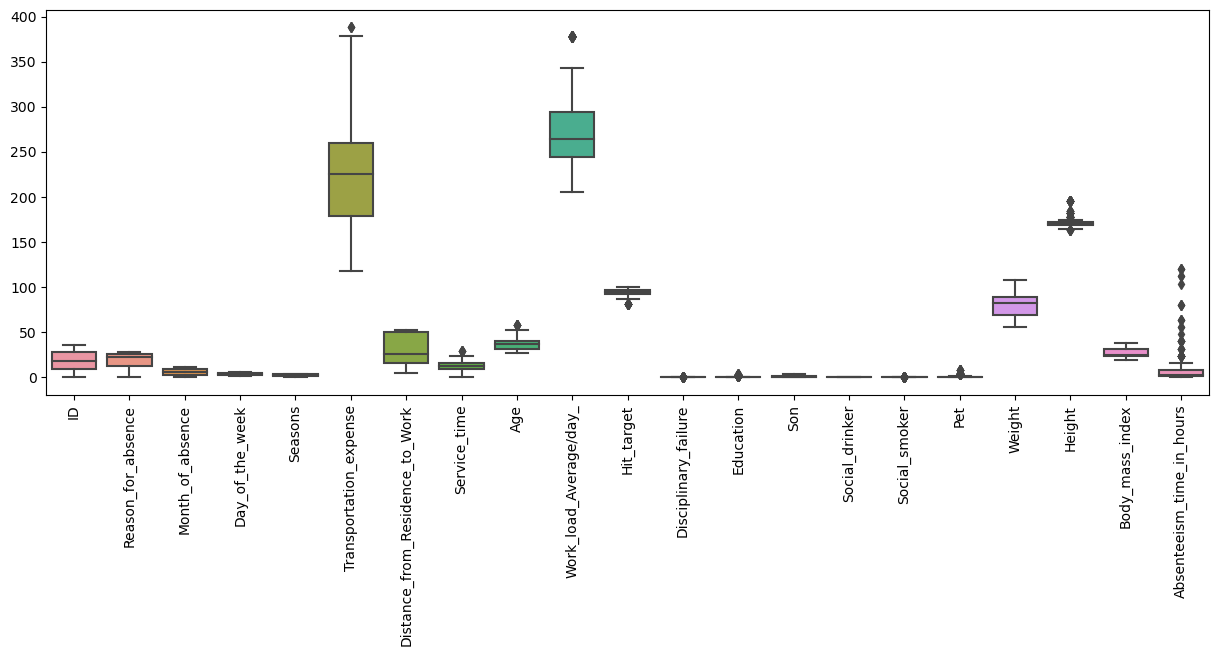

In [43]:
plt.figure(figsize=(15,5))
sns.boxplot(num_col)
plt.xticks(rotation=90)
plt.show()

From the above boxplot the highest spread exist in the dependent column('Absenteeism_time_in_hours'). It is real fact absenteeism can vary from employee to employee, so better to skip oulier treatment on the dataset.

In [44]:
num_col

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0


In [45]:
num_col.corr()>.7

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
ID,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Reason_for_absence,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Month_of_absence,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Day_of_the_week,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Seasons,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Transportation_expense,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Distance_from_Residence_to_Work,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Service_time,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
Age,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
Work_load_Average/day_,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


<Axes: >

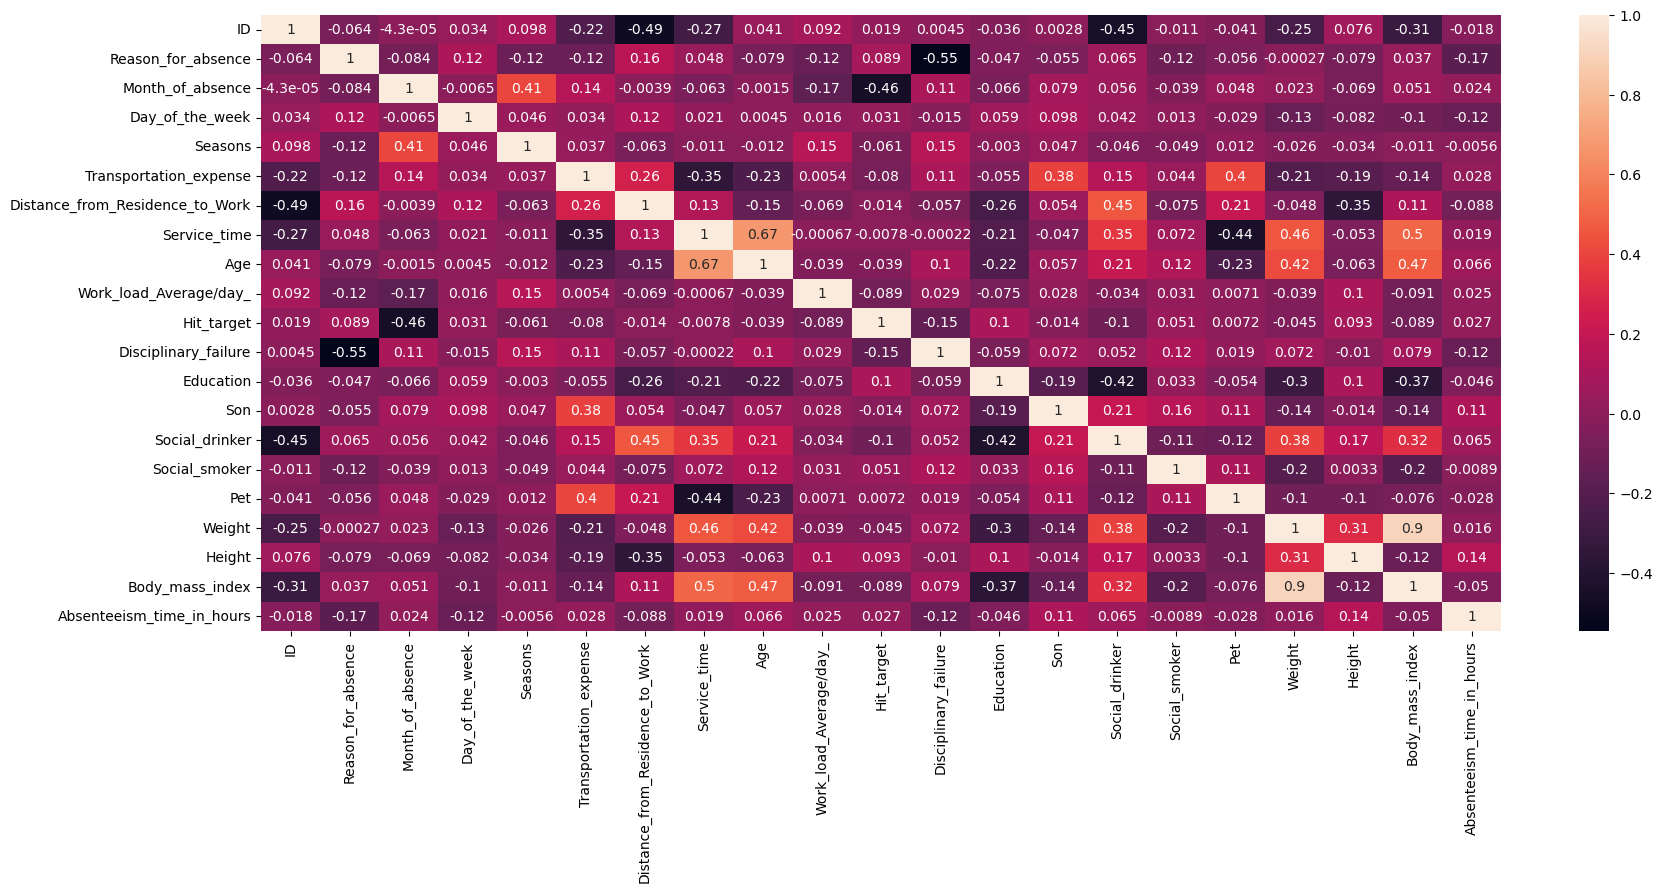

In [46]:
plt.figure(figsize=(20,8))
sns.heatmap(num_col.corr(),annot=True)

In [47]:
column = num_col.columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(num_col)
df_scaled = pd.DataFrame(df_scaled,columns=column)
df_scaled

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
0,-0.637161,0.804938,0.196763,-0.643947,-1.390175,1.011408,0.429556,0.101770,-0.532868,-0.818212,...,-0.239046,-0.433857,0.893723,0.872872,-0.280566,0.192850,0.851673,-0.019046,0.775932,-0.219511
1,1.632719,-2.280124,0.196763,-0.643947,-1.390175,-1.544379,-1.121694,1.242825,2.092860,-0.818212,...,4.183300,-0.433857,-0.017234,0.872872,-0.280566,-0.566240,1.473056,0.975828,1.009438,-0.519767
2,-1.363523,0.448970,0.196763,0.059924,-1.390175,-0.632665,1.441240,1.242825,0.239405,-0.818212,...,-0.239046,-0.433857,-0.928191,0.872872,-0.280566,-0.566240,0.774000,-0.350671,1.009438,-0.369639
3,-1.000342,-1.449530,0.196763,0.763796,-1.390175,0.861947,-1.661258,0.329981,0.393859,-0.818212,...,-0.239046,-0.433857,0.893723,0.872872,3.564226,-0.566240,-0.857131,-0.682295,-0.625100,-0.219511
4,-0.637161,0.448970,0.196763,0.763796,-1.390175,1.011408,0.429556,0.101770,-0.532868,-0.818212,...,-0.239046,-0.433857,0.893723,0.872872,-0.280566,0.192850,0.851673,-0.019046,0.775932,-0.369639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,-0.637161,-0.618937,0.196763,-0.643947,-1.390175,1.011408,0.429556,0.101770,-0.532868,-0.176427,...,-0.239046,-0.433857,0.893723,0.872872,-0.280566,0.192850,0.851673,-0.019046,0.775932,0.080744
736,-1.545113,-0.974905,0.196763,-0.643947,-1.390175,0.204318,-1.256585,0.329981,0.084950,-0.176427,...,-0.239046,2.538869,-0.017234,-1.145644,-0.280566,0.192850,0.696327,-0.019046,0.542427,-0.219511
737,-1.272728,-2.280124,-1.841698,-0.643947,-1.390175,-1.544379,-1.054248,0.101770,0.548314,-0.006949,...,-0.239046,-0.433857,-0.017234,0.872872,-0.280566,5.506478,1.473056,-0.350671,1.709954,-0.519767
738,-0.909547,-2.280124,-1.841698,0.059924,-0.490149,0.144533,0.362110,0.329981,0.393859,-0.006949,...,-0.239046,-0.433857,0.893723,0.872872,-0.280566,0.951940,1.628402,-0.350671,1.943459,-0.519767


In [48]:
df_scaled.corr()[['Absenteeism_time_in_hours']].sort_values('Absenteeism_time_in_hours',ascending=False)

,Absenteeism_time_in_hours
Absenteeism_time_in_hours,1.000000
Height,0.144420
Son,0.113756
Age,0.065760
Social_drinker,0.065067
Transportation_expense,0.027585
Hit_target,0.026695
Work_load_Average/day_,0.024749
Month_of_absence,0.024345
Service_time,0.019029


### 1-Feature :
- Reason_for_absence


In [49]:
X1 = np.array(df_scaled['Reason_for_absence']).reshape(-1,1)
y = np.array(df_scaled['Absenteeism_time_in_hours'])

In [50]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(X1,y,test_size=.3,random_state=200)

In [51]:
f1_model = LinearRegression().fit(X_train1,y_train1)
y_predict1 = f1_model.predict(X_test1)
print("Intercept :",f1_model.intercept_)
print("Slope :",f1_model.coef_)

Intercept : 0.003808725490963452
Slope : [-0.19747589]


In [52]:
from math import sqrt
MSE = mean_squared_error(y_test1,y_predict1)
print("MSE :",MSE)
MAE = mean_absolute_error(y_test1,y_predict1)
print("MAE :",MAE)

RMSE = sqrt(MSE)
print("RMSE :",RMSE)

R2 = r2_score(y_test1,y_predict1)
print("R2 :",R2)


MSE : 0.9017211871787671
MAE : 0.44923248904232144
RMSE : 0.9495900100457919
R2 : 0.008304217032900296


### 2-Features :
- Reason_for_absence
- Disciplinary_failure

In [53]:
X2 = np.array(df_scaled[['Reason_for_absence','Disciplinary_failure']]).reshape(-1,2)
y = np.array(df_scaled['Absenteeism_time_in_hours'])

In [54]:
print(X2.shape)
print(y.shape)

(740, 2)
(740,)


In [55]:
X_train2,X_test2,y_train2,y_test2 = train_test_split(X2,y,test_size=.3,random_state=200)

In [56]:
f2_model = LinearRegression().fit(X_train2,y_train2)
y_predict2 = f2_model.predict(X_test2)
print("Intercept :",f2_model.intercept_)
print("Slope :",f2_model.coef_)

Intercept : 0.0029520022636274814
Slope : [-0.36457627 -0.32366738]


In [57]:
MSE = mean_squared_error(y_test2,y_predict2)
print("MSE :",MSE)
MAE = mean_absolute_error(y_test2,y_predict2)
print("MAE :",MAE)

RMSE = sqrt(MSE)
print("RMSE :",RMSE)

R2 = r2_score(y_test2,y_predict2)
print("R2 :",R2)


MSE : 0.8374884639859759
MAE : 0.41881283341299236
RMSE : 0.9151439580666945
R2 : 0.07894614230259633


### 3-Features :
- Reason_for_absence
- Disciplinary_failure
- Distance_from_Residence_to_Work

In [58]:
X3 = np.array(df_scaled[['Reason_for_absence','Disciplinary_failure','Distance_from_Residence_to_Work']]).reshape(-1,3)
y = np.array(df_scaled['Absenteeism_time_in_hours'])

In [59]:
X_train3,X_test3,y_train3,y_test3 = train_test_split(X3,y,test_size=.3,random_state=200)

In [60]:
f3_model = LinearRegression().fit(X_train3,y_train3)
y_predict3 = f3_model.predict(X_test3)
print("Intercept :",f3_model.intercept_)
print("Slope :",f3_model.coef_)

Intercept : 0.0023509806700930357
Slope : [-0.35458188 -0.32140908 -0.04697836]


In [61]:
MSE = mean_squared_error(y_test3,y_predict3)
print("MSE :",MSE)
MAE = mean_absolute_error(y_test3,y_predict3)
print("MAE :",MAE)

RMSE = sqrt(MSE)
print("RMSE :",RMSE)

R2 = r2_score(y_test3,y_predict3)
print("R2 :",R2)


MSE : 0.8336453722496637
MAE : 0.42469467194575694
RMSE : 0.9130418239323234
R2 : 0.08317270137944432


### 4-Features :
- Reason_for_absence
- Disciplinary_failure
- Distance_from_Residence_to_Work
- Body_mass_index

In [62]:
X4 = np.array(df_scaled[['Reason_for_absence','Disciplinary_failure','Distance_from_Residence_to_Work','Body_mass_index']]).reshape(-1,4)
y = np.array(df_scaled['Absenteeism_time_in_hours'])

In [63]:
X_train4,X_test4,y_train4,y_test4 = train_test_split(X4,y,test_size=.3,random_state=200)
f4_model = LinearRegression().fit(X_train4,y_train4)
y_predict4 = f4_model.predict(X_test4)
print("Intercept :",f4_model.intercept_)
print("Slope :",f4_model.coef_)

Intercept : 0.0013883677556578691
Slope : [-0.35315395 -0.31992773 -0.04426921 -0.02422888]


In [64]:
MSE = mean_squared_error(y_test4,y_predict4)
print("MSE :",MSE)
MAE = mean_absolute_error(y_test4,y_predict4)
print("MAE :",MAE)

RMSE = sqrt(MSE)
print("RMSE :",RMSE)

R2 = r2_score(y_test4,y_predict4)
print("R2 :",R2)


MSE : 0.8357539508256799
MAE : 0.4257771931718587
RMSE : 0.9141957945788637
R2 : 0.08085372683207626


### Checking model's Homoscedasticity

In [65]:
def calculate_residuals(model,features,labels):
    predictions = model.predict(features)
    df_result = pd.DataFrame({'Actual':labels,'Predicted':predictions})
    df_result['Residuals'] = abs(df_result['Actual']) - abs(df_result['Predicted'])
    return df_result
def linear_assumption(model,features,labels):
    df_result = calculate_residuals(model,features,labels)
    sns.lmplot(x='Actual',y='Predicted',data=df_result,fit_reg=False)
    line= np.arange(df_result.min().min(),df_result.max().max())
    plt.plot(line,line,c='darkorange',linestyle='--')
    plt.title("Actual vs Predicted")
    plt.show()

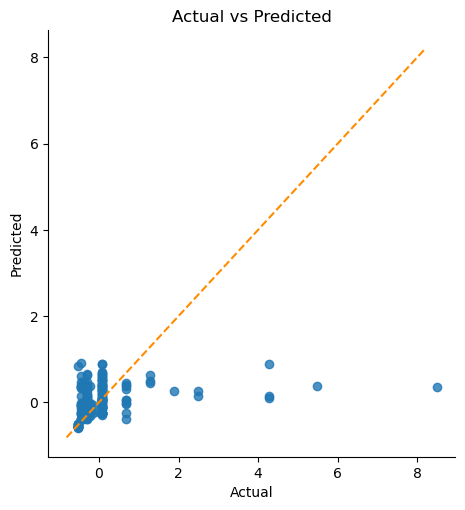

In [66]:
linear_assumption(f4_model,X_test4,y_test4)

###  Checking Homoscedasticity and Plot the residuals of linear regression


In [67]:
def homocedasticity(model,features,labels):
    df_result = calculate_residuals(model,features,labels)
    print(df_result)
    
    fig,ax = plt.subplots()
    ax = plt.subplot(111)
    plt.scatter(x=df_result.index,y=df_result.Residuals,alpha=.4)
    plt.plot(np.repeat(0,df_result.index.max()),c='darkorange',linestyle='--')
    plt.title("RESIDUAL PLOT")
    plt.xlabel("Index")
    plt.ylabel("Residual")
    plt.show()


       Actual  Predicted  Residuals
0   -0.519767  -0.565619  -0.045852
1    0.080744   0.585321  -0.504576
2   -0.294575  -0.168950   0.125625
3   -0.519767  -0.567035  -0.047268
4    0.080744   0.372980  -0.292236
..        ...        ...        ...
217  8.487898   0.363549   8.124350
218 -0.294575  -0.054703   0.239872
219 -0.144447  -0.075289   0.069158
220 -0.369639  -0.138510   0.231128
221 -0.369639  -0.197176   0.172462

[222 rows x 3 columns]


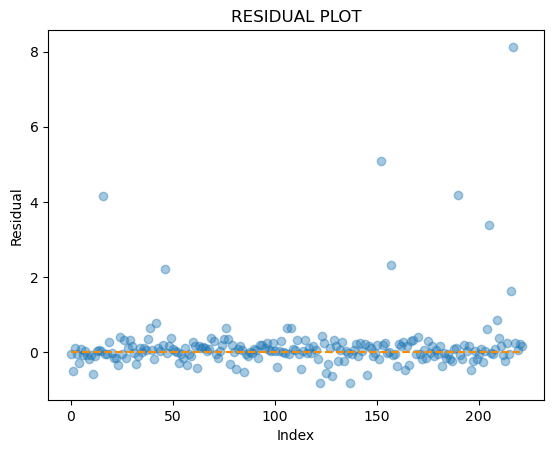

In [68]:
homocedasticity(f4_model,X_test4,y_test4)

### Plotting Error Distribution curve

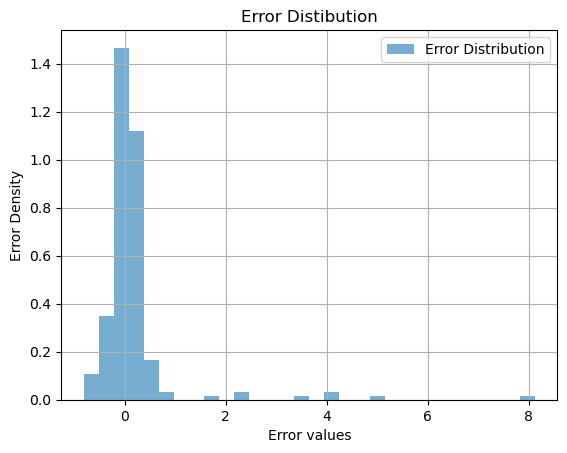

In [69]:
df_result = calculate_residuals(f4_model,X_test4,y_test4)
plt.hist(df_result.Residuals,30,label='Error Distribution',alpha=.6,density=True)
plt.title("Error Distibution")
plt.xlabel("Error values")
plt.ylabel("Error Density")
plt.legend()
plt.grid()
plt.show()


### Interpretation
#### Mean Squared Error (MSE): 0.8357
- MSE measures the average squared difference between the actual values and the predicted values.A lower MSE indicates better model performance, as it implies that the model's predictions are closer to the actual values.   However, the interpretation of the MSE value depends on the scale of the target variable.
#### Mean Absolute Error (MAE): 0.4258
- MAE measures the average absolute difference between the actual and predicted values. It provides a more intuitive measure of error than MSE as it represents the average magnitude of the prediction errors. A lower MAE indicates that the model's predictions are generally closer to the actual values.
#### Root Mean Squared Error (RMSE): 0.9142
- RMSE is the square root of MSE. It's useful because it's in the same units as the target variable, making it easier to interpret. A lower RMSE indicates better model performance.
#### R-squared (R2): 0.0808
- R-squared measures the proportion of variance in the target variable that is explained by the model. A higher R-squared value indicates a better fit, meaning the model explains a larger portion of the variability in the data. In this case, an R-squared of 0.0808 suggests that the model explains only a small portion of the variance in the data. This indicates that the model may not be a good fit for the data.
### Overall Interpretation:
- Based on these metrics, the performance of the multilinear regression model appears to be relatively poor. The low R-squared value suggests that the model is not able to accurately capture the relationships between the predictors and the target variable.

### Part 2
### Task 1
### Building Logistic Regression Model

In [70]:
label_encode = preprocessing.LabelEncoder()
absenteeism_df['Absenteeism_time_in_hours_encode'] = label_encode.fit_transform(absenteeism_df['Absenteeism_time_in_hours_c'])
absenteeism_df['Absenteeism_time_in_hours_encode'].unique()

array([1, 0])

In [71]:
X = df_scaled.drop('Absenteeism_time_in_hours',axis=1)
y = absenteeism_df['Absenteeism_time_in_hours_encode']

In [72]:
X.shape
y.shape

(740,)

In [73]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=200)

In [74]:
y_train

432    1
548    1
687    1
606    0
734    0
      ..
526    1
345    0
79     1
695    0
617    1
Name: Absenteeism_time_in_hours_encode, Length: 592, dtype: int32

In [75]:
logreg_model = LogisticRegression().fit(X_train,y_train)
logy_predict = logreg_model.predict(X_test)
logy_predict

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1])

### Model Evalution:
#### Confusion Matrix

In [76]:
print(confusion_matrix(y_test,logy_predict))

[[39 19]
 [11 79]]


In [77]:
tn,fp,fn,tp = confusion_matrix(y_test,logy_predict).ravel()
print(tn,fp,fn,tp)

39 19 11 79


### Interpretation:
- While evaluating the logistic regression model through confustion matrix, it came to know that the true postive(tp) is high while compare to the other matrices like tn,fp and fn
- This suggest that the model's overall performance is well and it correctly classifing the instances in both the positive and negative categories.

In [78]:
print("Precision :",precision_score(y_test,logy_predict))
print("Recall :",recall_score(y_test,logy_predict))
print("F1-score :",f1_score(y_test,logy_predict))
print("Accuracy :",accuracy_score(y_test,logy_predict))


Precision : 0.8061224489795918
Recall : 0.8777777777777778
F1-score : 0.8404255319148937
Accuracy : 0.7972972972972973


### Roc-Auc 

In [79]:
roc = roc_auc_score(y_test,logreg_model.predict_proba(X_test)[:,1])
print("Roc-Auc Score :" ,roc)

Roc-Auc Score : 0.8653256704980843


### Interpretation:
- This Roc_Auc Score = 0.86 indicates that the model ability is well good in distinguish between the postive and negative class and it is a perfect classifier. 

<Figure size 1000x600 with 0 Axes>

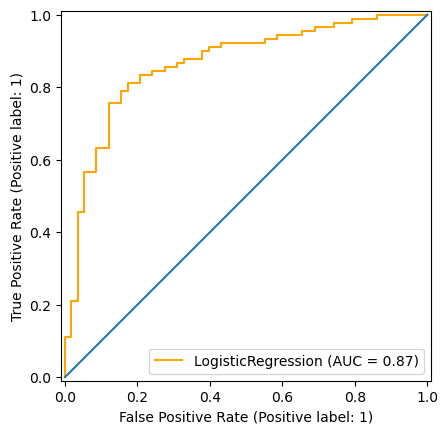

In [80]:
plt.figure(figsize=(10,6))
RocCurveDisplay.from_estimator(logreg_model,X_test,y_test,c='orange')
plt.plot([0,1],[0,1])
plt.show()

### Interpretation
#### Overall Performance:
- Accuracy: 0.7973 - This indicates that the model correctly predicted the class of 79.73% of the data points. It's a decent overall accuracy, suggesting the model is generally performing well.
#### Class-Level Performance:
- Precision: 0.8061 - Precision measures how many of the predicted positive cases were actually correct. A precision of 0.8061 means that 80.61% of the instances predicted as positive by the model were actually positive.
- Recall: 0.8778 - Recall measures the model's ability to correctly identify all the actual positive cases. A recall of 0.8778 means the model correctly identified 87.78% of the actual positive instances.
- F1-score: 0.8404 - The F1-score is the harmonic mean of precision and recall. It provides a balanced measure of both precision and recall. F1-score of 0.8404 indicates a good balance between precision and recall.
- ROC-AUC Score: 0.8653 - This score measures the model's ability to distinguish between positive and negative classes. A higher ROC-AUC score indicates better performance. An ROC-AUC of 0.8653 suggests that the model has good discriminatory power.

### Overall Interpretation:
- The Logistic Regression model demonstrates good overall performance with high accuracy, precision, recall, F1-score, and ROC-AUC.
- The model has a good balance between precision and recall, indicating that it can effectively identify both true positive and true negative instances.
- The high ROC-AUC score further confirms the model's ability to distinguish between the classes effectively.

### Building KNN Model

### Finding k Values using the error rate

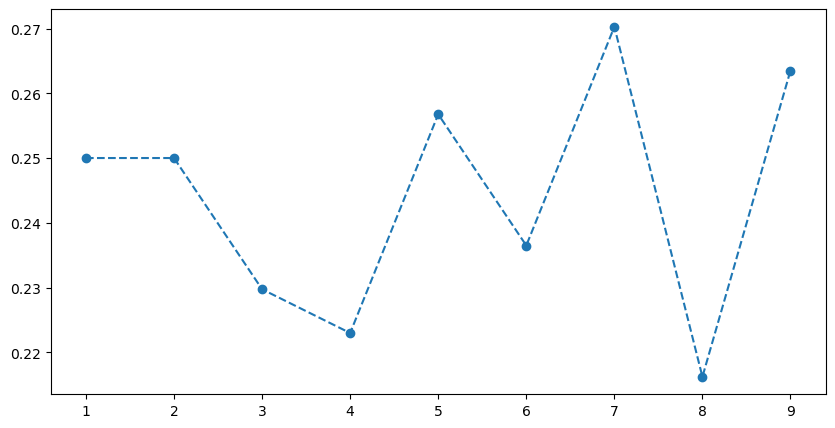

In [81]:
error_rate=[]
for k in range(1,10):
    absent = neighbors.KNeighborsClassifier(n_neighbors=k)
    absent.fit(X_train,y_train)
    y_predict = absent.predict(X_test)
    error_rate.append(np.mean(y_predict != y_test))
    
plt.figure(figsize=(10,5))
plt.plot(range(1,10),error_rate,marker='o',linestyle='--')
plt.show()

In [82]:
k=8
Absenteeism_classifier = neighbors.KNeighborsClassifier(k)
Absenteeism_classifier.fit(X,y)

KNeighborsClassifier(n_neighbors=8)

In [83]:
print(Absenteeism_classifier.classes_)
print(Absenteeism_classifier.n_neighbors)

[0 1]
8


In [84]:
print("Recall Score :",recall_score(y_test,y_predict))
print("F1 - Score :",f1_score(y_test,y_predict))
print("Precision Score :",precision_score(y_test,y_predict))
print("Accuracy Score:",accuracy_score(y_test,y_predict))

Recall Score : 0.9
F1 - Score : 0.8059701492537313
Precision Score : 0.7297297297297297
Accuracy Score: 0.7364864864864865


### Interpretation:

#### Overall Performance:
- Accuracy: 0.7365 - This indicates that the model correctly predicted the class of 73.65% of the data points. While decent, it suggests that there's room for improvement in the model's overall accuracy.
#### Class-Level Performance:
- Recall: 0.9 - This is a very high recall score. It means that the model is excellent at identifying the true positive cases. In other words, it rarely misses instances of the positive class.
- Precision: 0.7297 - Precision is relatively lower compared to recall. This suggests that a significant portion of the instances predicted as positive by the model are actually negative.
- F1-Score: 0.8059 - The F1-score, which balances precision and recall, is moderate. This reflects the trade-off between precision and recall in the model's performance.
#### Summary :
- The KNN model exhibits high recall but lower precision, indicating a potential bias towards identifying true positives. Further analysis and optimization are necessary to improve overall performance and achieve a better balance between precision and recall.

### Task 2 : Grouping employess with similar Absenteeism patterns

### Building K-Means Clustering model

In [85]:
X = df_scaled
X

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
0,-0.637161,0.804938,0.196763,-0.643947,-1.390175,1.011408,0.429556,0.101770,-0.532868,-0.818212,...,-0.239046,-0.433857,0.893723,0.872872,-0.280566,0.192850,0.851673,-0.019046,0.775932,-0.219511
1,1.632719,-2.280124,0.196763,-0.643947,-1.390175,-1.544379,-1.121694,1.242825,2.092860,-0.818212,...,4.183300,-0.433857,-0.017234,0.872872,-0.280566,-0.566240,1.473056,0.975828,1.009438,-0.519767
2,-1.363523,0.448970,0.196763,0.059924,-1.390175,-0.632665,1.441240,1.242825,0.239405,-0.818212,...,-0.239046,-0.433857,-0.928191,0.872872,-0.280566,-0.566240,0.774000,-0.350671,1.009438,-0.369639
3,-1.000342,-1.449530,0.196763,0.763796,-1.390175,0.861947,-1.661258,0.329981,0.393859,-0.818212,...,-0.239046,-0.433857,0.893723,0.872872,3.564226,-0.566240,-0.857131,-0.682295,-0.625100,-0.219511
4,-0.637161,0.448970,0.196763,0.763796,-1.390175,1.011408,0.429556,0.101770,-0.532868,-0.818212,...,-0.239046,-0.433857,0.893723,0.872872,-0.280566,0.192850,0.851673,-0.019046,0.775932,-0.369639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,-0.637161,-0.618937,0.196763,-0.643947,-1.390175,1.011408,0.429556,0.101770,-0.532868,-0.176427,...,-0.239046,-0.433857,0.893723,0.872872,-0.280566,0.192850,0.851673,-0.019046,0.775932,0.080744
736,-1.545113,-0.974905,0.196763,-0.643947,-1.390175,0.204318,-1.256585,0.329981,0.084950,-0.176427,...,-0.239046,2.538869,-0.017234,-1.145644,-0.280566,0.192850,0.696327,-0.019046,0.542427,-0.219511
737,-1.272728,-2.280124,-1.841698,-0.643947,-1.390175,-1.544379,-1.054248,0.101770,0.548314,-0.006949,...,-0.239046,-0.433857,-0.017234,0.872872,-0.280566,5.506478,1.473056,-0.350671,1.709954,-0.519767
738,-0.909547,-2.280124,-1.841698,0.059924,-0.490149,0.144533,0.362110,0.329981,0.393859,-0.006949,...,-0.239046,-0.433857,0.893723,0.872872,-0.280566,0.951940,1.628402,-0.350671,1.943459,-0.519767


In [86]:
# Initially taking number of cluster is 3
KMeans_model = KMeans(n_clusters=3)
KMeans_model.fit(X)

KMeans(n_clusters=3)

In [87]:
label = KMeans_model.labels_
label

array([1, 2, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       2, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 2, 0, 1, 1, 1, 1, 1, 1, 0, 2, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 2, 0, 1,
       0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 2, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 2, 1, 2, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 2, 1, 2, 0, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 0, 1, 0, 1, 1, 2, 2, 1, 0, 0, 2, 1, 1, 1, 0, 0, 0, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 2, 0, 2, 2, 0, 1, 1, 0, 2, 2, 0, 0, 0, 0,
       2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2,
       1, 0, 2, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 1,

### Finding the optimum K value using elbow method and silhouette values

In [88]:
KMeans_model.inertia_

12723.213699174661

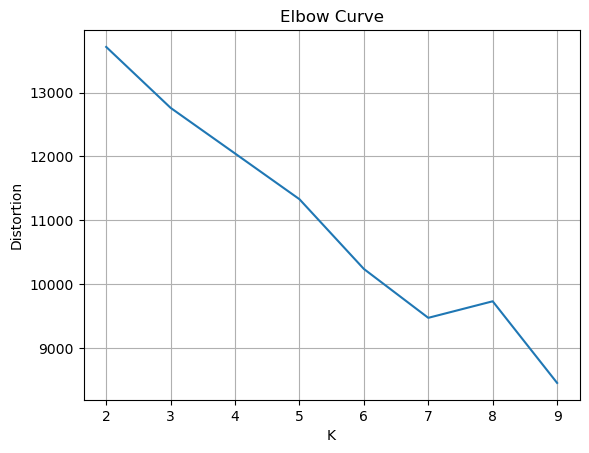

In [89]:
Distortion = []
for k in range(2,10):
    KMeans_model = KMeans(n_clusters=k)
    KMeans_model.fit(X)
    Distortion.append(KMeans_model.inertia_)
plt.plot(range(2,10),Distortion)
plt.grid(True)
plt.xlabel("K")
plt.ylabel("Distortion")
plt.title("Elbow Curve")
plt.show()

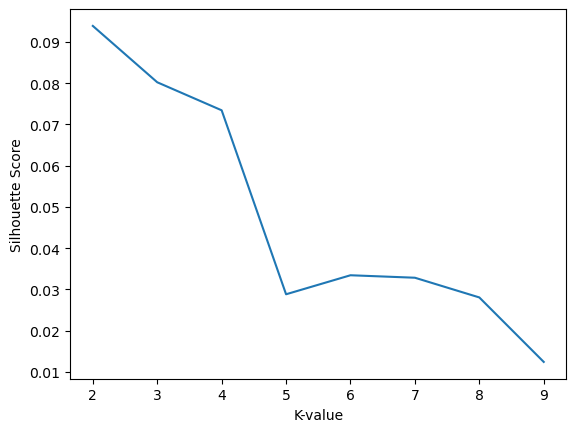

In [95]:
cls_range = range(2,10)
silhouettescores = []

for n_clusters in cls_range:
    silhouettescores.append(silhouette_score(X,KMeans(n_clusters = n_clusters).fit_predict(num_col[['Absenteeism_time_in_hours','Reason_for_absence']])))
plt.plot(cls_range,silhouettescores)
plt.xlabel("K-Value")
plt.ylabel("Silhouette Score")
plt.show()
    

In [91]:
silhouettescores

[0.30109716574295076,
 0.08190901281337265,
 0.06034024754513037,
 0.03676167007228563,
 0.03239647401840754,
 0.026451069054582853,
 0.013741562393763996,
 0.011914974311625361]

In [92]:
KMeans_model = KMeans(n_clusters=2)
KMeans_model.fit(X)

KMeans(n_clusters=2)

In [93]:
label_2 = KMeans_model.labels_
label_2

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [94]:
CHI = calinski_harabasz_score(X,label_2)
DBI = davies_bouldin_score(X,label_2)

print("Silhouette Score :",silhouettescores[0])
print("Calinski Harabasz Score:",CHI)
print("Davies Bouldin Score",DBI)

Silhouette Score : 0.30109716574295076
Calinski Harabasz Score: 60.10265067708553
Davies Bouldin Score 2.599254076140459


### Overall Interpretation
#### Silhouettescores : 0.195
- It represents that score = 19.5%, suggests that the clusters are far apart from each other. Indicates low performance 
#### Calinski Harabasz Score : 68.7
- This score indicates a low seperation between the clusters and the overall model performance 
#### Davies Bouldin Score : 1.91
- This suggest a moderate seperation between the clusters.
#### In summary : This KMeans model with k=2 demonstrates a low performance in forming the distinct clusters.